Q-learning agent solving the FrozenLake8x8-v0 environment from the Gym package. 
Main classes: `discreteQlearningAgent` and `gymTrainer`. 

To do:
- Inherit all agents from a common (abstract) class. Check if a loaded agent is correct before the training (or test).
- Add a function that checks sizes of state and action spaces in a given (discrete) environments and test if the same agent implementations can be used in other environments.
- Implement other agents:
    - SARSA.
    - Policy gradient.
    - Model based (e.g., Dyna-Q).
    - A better handcrafted agent (graph search + heuristics).  
- Add and test a potential-based shaping reward function [Ng, A. Y., Harada, D., & Russell, S. (1999, June). Policy invariance under reward transformations: Theory and application to reward shaping. In Icml (Vol. 99, pp. 278-287).](https://people.eecs.berkeley.edu/~pabbeel/cs287-fa09/readings/NgHaradaRussell-shaping-ICML1999.pdf)
- Non-tabular (functional approximator) training for randomized maps.
- Functional approximators for non-discrete environments.

Comments
- Looking at the Q function I can see some interesting (rather simple) tactics. For example, it's often better not to go directly "where we want", but instead to go in the direction opposite to H. 
- Two related reasons why it is useful to switch between greedy and stochastic policies:
    - We test how the greedy (with respect to the estimated Q-function) performs. That way we can gauge the real progress.
    - Stochastic (softmax) policy rarely gets to the goal, because it is not easy to tune $\beta$ (this is the reason why I randomize $\beta$). This slows down the traning. Greedy policies, on the other hand, may not explore enough. This is why it may be a good idea to interleave both policies during training.

== Trained agent (tabular Q-learning): ==
Win rate: 87.2 ± 3.2 %
Average number of steps: 89.6 ± 4.3
== Simple handcrafted agent: ==
Win rate: 69.2 ± 4.4 %
Average number of steps: 141.9 ± 5.1
== agentQL.pickle: ==
Win rate: 88.3 ± 3.0 %
Average number of steps: 85.8 ± 4.1


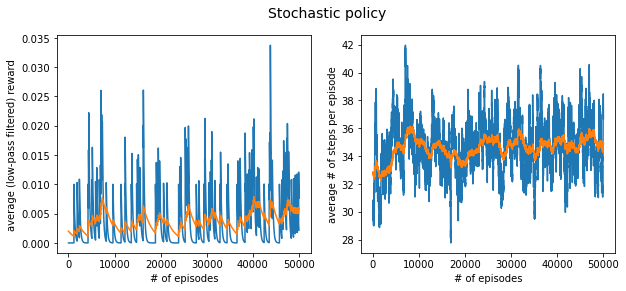

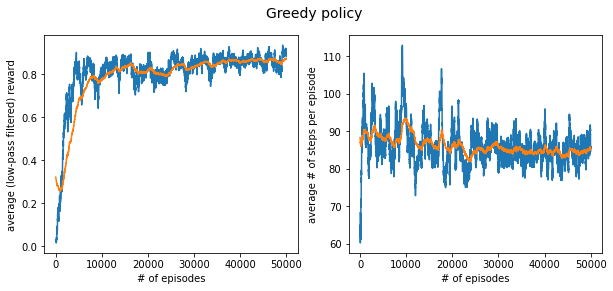

In [10]:
import gym
import rlsolvers    

path_models = "models/"

# Create an instance of the FrozeLake8x8-v0 or FrozenLake8x8-v1 environment
env = gym.make('FrozenLake8x8-v1')#, map_name=None)
# Instantiate an agent (discreteQlearningAgent)
agent = rlsolvers.discreteQlearningAgent()
# Instantiate a gymTrainer
trainer = rlsolvers.gymTrainer(env, agent)
# It is also possible to specify the path with a pickle containing the agent:
# trainer = gymTrainer(env, "agentQ.pickle")

# Train the agent for Nepisodes steps. By default this will also visualize the training.
# If save_name is specified as a string (filename), 
# the agent will be automatically saved to the file (pickle) at the end of the training. 
trainer.train(Nepisodes=50000, save_name=path_models+"agentQL.pickle")

# Test the trained agent in the trainer.
print("== Trained agent (tabular Q-learning): ==")
trainer.test()

# Test another agent (loaded externally) using the same trainer. Note that this will not update the agent for future training.
print("== Simple handcrafted agent: ==")
agentHC = rlsolvers.testAgent()   # Handcrafted agent
trainer.test(agentHC)

# Test an agent loaded directly from a specified path.
print("== agentQL.pickle: ==")
trainer.test(path_models+"agentQL.pickle")

# Save the trained agent whenever needed. 
# Note that agentXXX.pickle and agentQL.pickle should be identical
trainer.save_agent(path_models+"agentXXX.pickle");

# Load an agent into the trainer.
trainer.load_agent(agentHC)

# Save the agent.
trainer.save_agent(path_models+"agentHC.pickle")

In [11]:
trainer.test(6)

Exception: agent: method new_episode not implemented correctly.

In [8]:
import numpy as np
print(np.__version__)
import matplotlib as mpl
print(mpl.__version__)
print(gym.__version__)
import pickle
print(pickle.format_version)

1.19.2
3.3.2
0.21.0
4.0


In [4]:
import sys
print(sys.version)

3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
